## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [8]:
diabetes_data.replace(to_replace={'Glucose': 0, 'BloodPressure': 0, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 0}, value=np.nan, inplace=True)

In [10]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


**<font color='teal'> Plot histograms of each column. </font>**

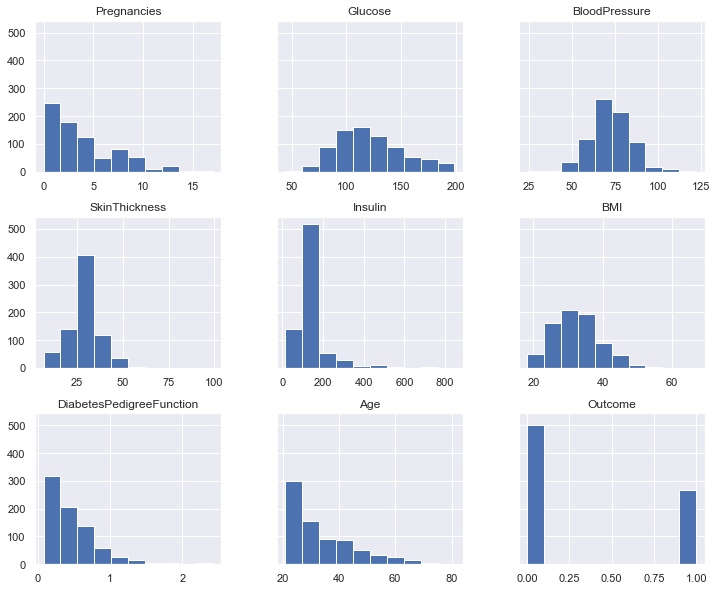

In [16]:
diabetes_data.hist(figsize=(12,10), sharey=True)
plt.show()

#### Replace the zeros with mean and median values.

In [13]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

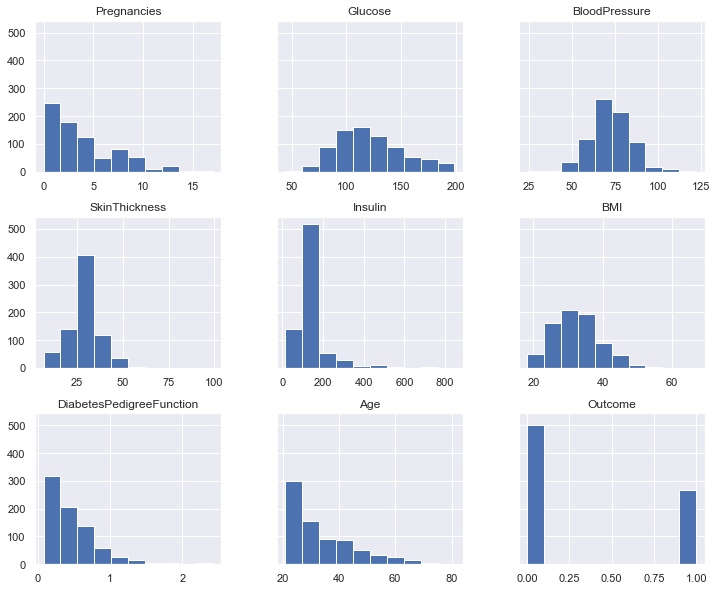

In [17]:
diabetes_data.hist(figsize=(12,10), sharey=True)
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


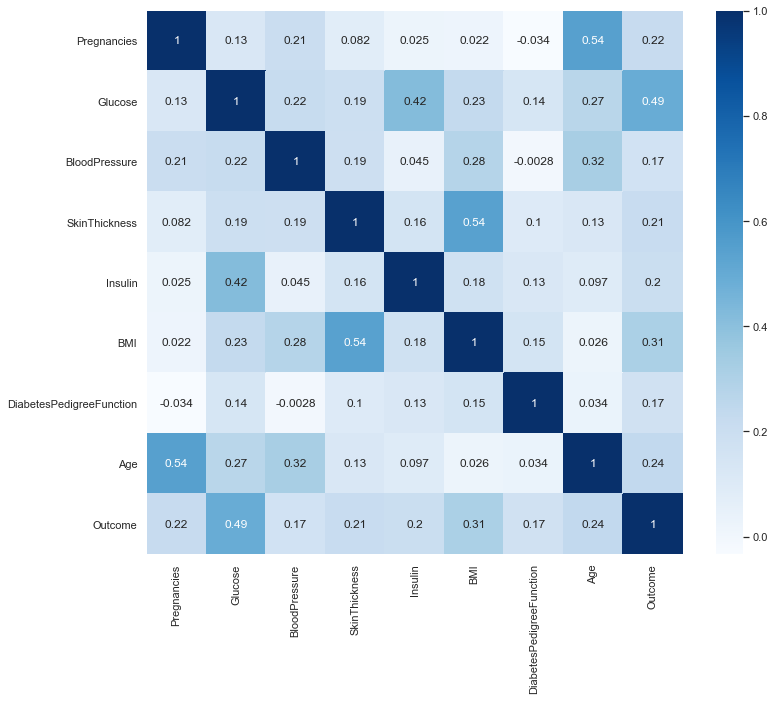

In [18]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [21]:
y = diabetes_data.Outcome
X = diabetes_data.drop(columns='Outcome')

In [23]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [22]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47


**<font color='teal'> Create a 70/30 train and test split. </font>**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,95.0,60.000000,18.0,58.0,23.9,0.260,22
139,5,105.0,72.000000,29.0,325.0,36.9,0.159,28
485,0,135.0,68.000000,42.0,250.0,42.3,0.365,24
547,4,131.0,68.000000,21.0,166.0,33.1,0.160,28
18,1,103.0,30.000000,38.0,83.0,43.3,0.183,33
...,...,...,...,...,...,...,...,...
71,5,139.0,64.000000,35.0,140.0,28.6,0.411,26
106,1,96.0,122.000000,29.0,125.0,22.4,0.207,27
270,10,101.0,86.000000,37.0,125.0,45.6,1.136,38
435,0,141.0,72.405184,29.0,125.0,42.4,0.205,29


In [29]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98.0,58.000000,33.0,190.0,34.0,0.430,43
324,2,112.0,75.000000,32.0,125.0,35.7,0.148,21
624,2,108.0,64.000000,29.0,125.0,30.8,0.158,21
690,8,107.0,80.000000,29.0,125.0,24.6,0.856,34
473,7,136.0,90.000000,29.0,125.0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
619,0,119.0,72.405184,29.0,125.0,32.4,0.141,24
198,4,109.0,64.000000,44.0,99.0,34.8,0.905,26
538,0,127.0,80.000000,37.0,210.0,36.3,0.804,23
329,6,105.0,70.000000,32.0,68.0,30.8,0.122,37


**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [30]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test  = SS.transform(X_test)

In [31]:
X_test

array([[ 0.69748316, -0.79647461, -1.16842292, ...,  0.24771813,
        -0.11680393,  0.85019217],
       [-0.52953881, -0.3315193 ,  0.2257678 , ...,  0.49203737,
        -0.94192338, -1.03426754],
       [-0.52953881, -0.46436368, -0.67635561, ..., -0.2121769 ,
        -0.91266382, -1.03426754],
       ...,
       [-1.14304979,  0.16664709,  0.63582389, ...,  0.57826769,
         0.97750343, -0.86295302],
       [ 0.69748316, -0.56399695, -0.1842883 , ..., -0.2121769 ,
        -1.01799822,  0.33624861],
       [ 0.39072767, -1.49390756,  0.79984633, ...,  0.50640909,
        -0.91851573,  0.16493409]])

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [32]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [35]:
print("K \tTrain\tTest")
for s in range(len(train_scores)):
    print("{}\t{}\t{}".format(s+1, round(train_scores[s], 3), round(test_scores[s], 3)))

K 	Train	Test
1	1.0	0.667
2	0.851	0.671
3	0.855	0.671
4	0.842	0.693
5	0.84	0.701
6	0.823	0.684
7	0.834	0.732
8	0.821	0.736
9	0.827	0.732


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [30]:
1

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [31]:
8

Plot the train and test model performance by number of neighbors.

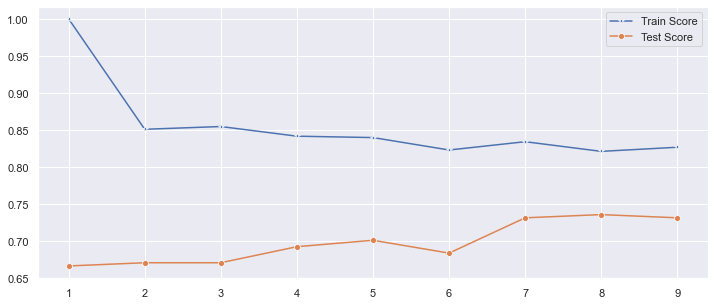

In [37]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,10), y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,10), y=test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [40]:
knn = KNeighborsClassifier(8)
knn.fit(X_train,y_train)
    
print("Best K neighbors training score = ", knn.score(X_train,y_train))
print("Best K neighbors testing score = ", knn.score(X_test,y_test))

Best K neighbors training score =  0.8212290502793296
Best K neighbors testing score =  0.7359307359307359


In [41]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

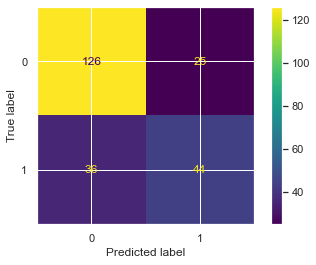

In [42]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test)  

**<font color='teal'> Print the classification report </font>**

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       151
           1       0.64      0.55      0.59        80

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [52]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [63]:

print("Train Score:" + str(knn_cv.score(X_train, y_train)))
print("Test Score:" + str(knn_cv.score(X_test, y_test)))

print("Best Score:" + str(knn_cv.best_score_))
print("Best Estimator: " + str(knn_cv.best_estimator_))
print("Best Parameters: " + str(knn_cv.best_params_))

knn1 = knn_cv.best_estimator_
knn1.fit(X_train, y_train)

print("Train Score:" + str(knn_cv.score(X_train, y_train)))
print("Test Score:" + str(knn_cv.score(X_test, y_test)))

##Best Score:0.7711378353376503
##Best Parameters: {'n_neighbors': 15}
#Best Score:0.7951021114572516
#Best Parameters: {'n_neighbors': 11}

Train Score:0.8212290502793296
Test Score:0.7186147186147186
Best Score:0.7951021114572516
Best Estimator: KNeighborsClassifier(n_neighbors=11)
Best Parameters: {'n_neighbors': 11}
Train Score:0.8212290502793296
Test Score:0.7186147186147186


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [108]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators':np.arange(25,200,25), 'criterion':['gini', 'entropy']}
rfc = RandomForestClassifier()
rfc_cv= GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1, verbose=3, return_train_score=True)
rfc_cv.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   32.8s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': array([ 25,  50,  75, 100, 125, 150, 175])},
             return_train_score=True, verbose=3)

In [109]:
print("Best Score:" + str(rfc_cv.best_score_))
print("Best Estimator: " + str(rfc_cv.best_estimator_))
print("Best Parameters: " + str(rfc_cv.best_params_))

rfc1 = rfc_cv.best_estimator_
rfc1.fit(X_train, y_train)

print("Train Score:" + str(rfc1.score(X_train, y_train)))
print("Test Score:" + str(rfc1.score(X_test, y_test)))

print(rfc_cv.score(X_train, y_train))
rfc_cv.score(X_test, y_test)

Best Score:0.7764624437521633
Best Estimator: RandomForestClassifier(n_estimators=175)
Best Parameters: {'criterion': 'gini', 'n_estimators': 175}
Train Score:1.0
Test Score:0.7489177489177489
1.0


0.7489177489177489

N trees	Crit	Train	Test Acc
25	gini	0.9991	0.7764
50	gini	1.0	0.7653
75	gini	1.0	0.7691
100	gini	1.0	0.7653
125	gini	1.0	0.7597
150	gini	1.0	0.7709
175	gini	1.0	0.7765
25	entropy	0.9981	0.7541
50	entropy	1.0	0.7672
75	entropy	1.0	0.7765
100	entropy	1.0	0.7691
125	entropy	1.0	0.7653
150	entropy	1.0	0.7597
175	entropy	1.0	0.756


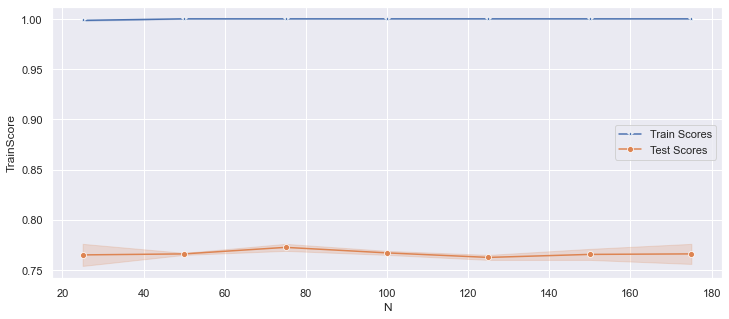

In [118]:
print("N trees\tCrit\tTrain\tTest Acc")
i=0
score=[]
for p in rfc_cv.cv_results_['params']:
    print("{}\t{}\t{}\t{}".format(p['n_estimators'], p['criterion'], round(rfc_cv.cv_results_['mean_train_score'][i], 4), round(rfc_cv.cv_results_['mean_test_score'][i], 4))) 
    score.append([p['n_estimators'], p['criterion'], round(rfc_cv.cv_results_['mean_train_score'][i], 3), round(rfc_cv.cv_results_['mean_test_score'][i], 3)])
    i += 1
    
    
results = pd.DataFrame(score, columns=['N','criterion','TrainScore', 'TestScore'])
          

plt.figure(figsize=(12,5))
p = sns.lineplot(x=results.N, y=results.TrainScore,marker='*',label='Train Scores')
p = sns.lineplot(x=results.N, y=results.TestScore, marker='o',label='Test Scores')

This is overfit.  The training scores are stuck very near perfection and the testing scores just wiggle a bit around 77%.

Let's try limiting the max depth.  Add it as a parameter with values from 2 to 10.

In [119]:
param_grid = {'n_estimators':np.arange(25,201,25), 'criterion':['gini', 'entropy'], 'max_depth':range(2,11)}
rfc = RandomForestClassifier()
rfc_cv= GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1, verbose=3, return_train_score=True)
rfc_cv.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  2.1min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 11),
                         'n_estimators': array([ 25,  50,  75, 100, 125, 150, 175, 200])},
             return_train_score=True, verbose=3)

Best Score:0.7783662166839737
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 25}


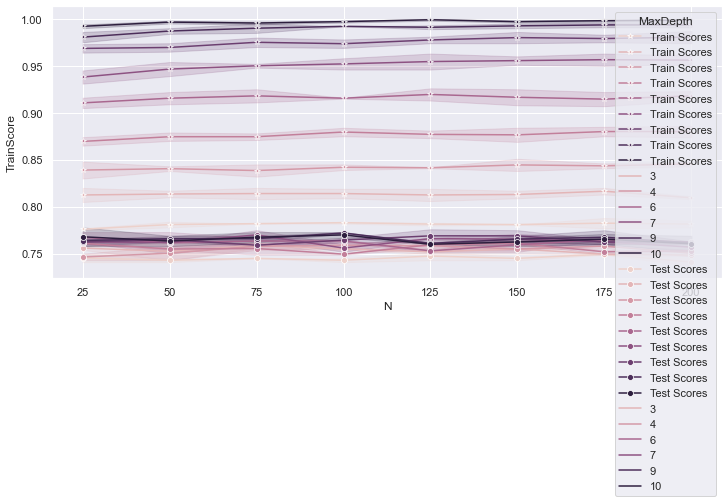

In [122]:
print("Best Score:" + str(rfc_cv.best_score_))
print("Best Parameters: " + str(rfc_cv.best_params_))

i=0
score=[]
for p in rfc_cv.cv_results_['params']:
    #print("{}\t{}\t{}\t{}".format(p['n_estimators'], p['criterion'], round(rfc_cv.cv_results_['mean_train_score'][i], 4), round(rfc_cv.cv_results_['mean_test_score'][i], 4))) 
    score.append([p['n_estimators'], p['criterion'], p['max_depth'], round(rfc_cv.cv_results_['mean_train_score'][i], 3), round(rfc_cv.cv_results_['mean_test_score'][i], 3)])
    i += 1
    
results = pd.DataFrame(score, columns=['N','criterion', 'MaxDepth', 'TrainScore', 'TestScore'])
          

plt.figure(figsize=(12,5))
p = sns.lineplot(x=results.N, y=results.TrainScore,hue=results.MaxDepth, marker='*',label='Train Scores')
p = sns.lineplot(x=results.N, y=results.TestScore, hue=results.MaxDepth, marker='o',label='Test Scores')

Fitting 4 folds for each of 160 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 380 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   38.9s finished


Best Score:0.7932006633499171
Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 50}


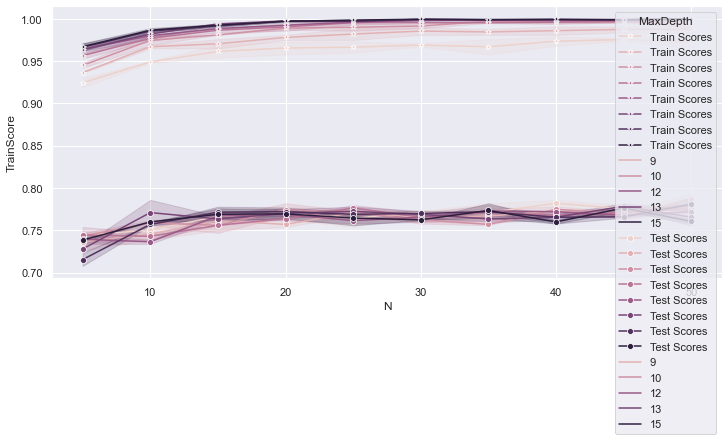

In [124]:
### Try focusing on the left end of N Trees and the right end of Max Depth

param_grid = {'n_estimators':np.arange(5,51,5), 'criterion':['gini', 'entropy'], 'max_depth':range(8,16)}
rfc = RandomForestClassifier()
rfc_cv= GridSearchCV(rfc, param_grid, cv=4, n_jobs=-1, verbose=3, return_train_score=True)
rfc_cv.fit(X_train, y_train)

print("Best Score:" + str(rfc_cv.best_score_))
print("Best Parameters: " + str(rfc_cv.best_params_))

i=0
score=[]
for p in rfc_cv.cv_results_['params']:
    #print("{}\t{}\t{}\t{}".format(p['n_estimators'], p['criterion'], round(rfc_cv.cv_results_['mean_train_score'][i], 4), round(rfc_cv.cv_results_['mean_test_score'][i], 4))) 
    score.append([p['n_estimators'], p['criterion'], p['max_depth'], round(rfc_cv.cv_results_['mean_train_score'][i], 3), round(rfc_cv.cv_results_['mean_test_score'][i], 3)])
    i += 1
    
results = pd.DataFrame(score, columns=['N','criterion', 'MaxDepth', 'TrainScore', 'TestScore'])
          

plt.figure(figsize=(12,5))
p = sns.lineplot(x=results.N, y=results.TrainScore,hue=results.MaxDepth, marker='*',label='Train Scores')
p = sns.lineplot(x=results.N, y=results.TestScore, hue=results.MaxDepth, marker='o',label='Test Scores')

Fitting 4 folds for each of 250 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 628 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 916 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   57.0s finished


Best Score:0.7913488114980652
Best Parameters: {'criterion': 'gini', 'max_depth': 14, 'min_samples_split': 2, 'n_estimators': 30}


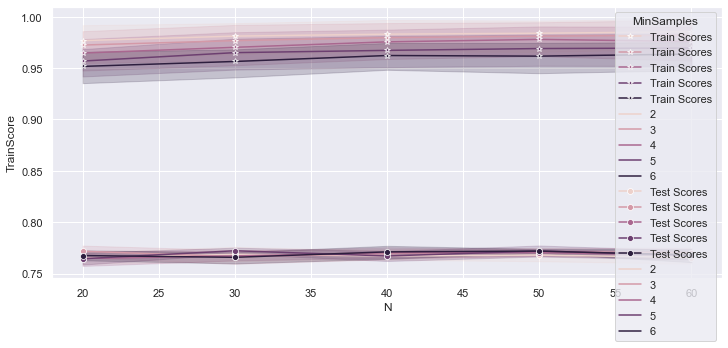

In [128]:
### Max Depth helped a little bit.  Let's add in Min Samples Split.  N Trees below 15 weren't so good.

param_grid = {'n_estimators':np.arange(20,61,10), 'criterion':['gini'], 'max_depth':range(6,16), 'min_samples_split':range(2,7)}
rfc = RandomForestClassifier()
rfc_cv= GridSearchCV(rfc, param_grid, cv=4, n_jobs=-1, verbose=3, return_train_score=True)
rfc_cv.fit(X_train, y_train)

print("Best Score:" + str(rfc_cv.best_score_))
print("Best Parameters: " + str(rfc_cv.best_params_))

i=0
score=[]
for p in rfc_cv.cv_results_['params']:
    #print("{}\t{}\t{}\t{}".format(p['n_estimators'], p['criterion'], round(rfc_cv.cv_results_['mean_train_score'][i], 4), round(rfc_cv.cv_results_['mean_test_score'][i], 4))) 
    score.append([p['n_estimators'], p['criterion'], p['max_depth'], p['min_samples_split'], round(rfc_cv.cv_results_['mean_train_score'][i], 3), round(rfc_cv.cv_results_['mean_test_score'][i], 3)])
    i += 1
    
results = pd.DataFrame(score, columns=['N','criterion', 'MaxDepth', 'MinSamples', 'TrainScore', 'TestScore'])
          

plt.figure(figsize=(12,5))
p = sns.lineplot(x=results.N, y=results.TrainScore,hue=results.MinSamples, marker='*',label='Train Scores')
p = sns.lineplot(x=results.N, y=results.TestScore, hue=results.MinSamples, marker='o',label='Test Scores')

MinSamplesSplit wanted to go back to the default of 2, although the Training Scores were also lower with more samples in the leaf nodes (MinSamples up to 6), suggesting it's not as overfit.

The bottom line is regardless of what I did, the training scores stayed glued above 95% while the the test scores remained in the 75 to 80% region.  Looks like this is the best we'll do with Random Forest.

Let's take the best combination of parameters over all these trials:
Best Score:0.7932006633499171
Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 50} (and MinSamplesSplit=2)